In [1]:
#https://sandipanweb.wordpress.com/2018/06/30/detection-of-a-human-object-with-hog-descriptor-features-using-svm-primal-quadprog-implementation-using-cvxopt-in-python/
import cv2
import os
import glob
from skimage import data, exposure
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage.feature import hog
import scipy.misc

# X_train, labels_train
X_train = []
Y_train = []
for file in glob.glob("C:\\Users\\duyph\\Desktop\\sign_traffic\\left\\*.jpg"):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fd, hog_image = hog(img, orientations = 9, pixels_per_cell= (8,8), cells_per_block = (2,2), visualize = True, multichannel = False)
    X_train = np.append(X_train,fd, axis = 0)	 
for file in glob.glob("C:\\Users\\duyph\\Desktop\\sign_traffic\\right\\*.jpg"):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fd, hog_image = hog(img, orientations = 9, pixels_per_cell= (8,8), cells_per_block = (2,2), visualize = True, multichannel = False)    
    X_train = np.append(X_train,fd, axis = 0) 
for file in glob.glob("C:\\Users\\duyph\\Desktop\\sign_traffic\\No_traffic\\*.jpg"):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fd, hog_image = hog(img, orientations = 9, pixels_per_cell= (8,8), cells_per_block = (2,2), visualize = True, multichannel = False)    
    X_train = np.append(X_train,fd, axis = 0)
    
X_train = X_train.reshape(-1,1764)   
Y_train = np.append(np.zeros(31), np.ones(31), axis =0)
a=np.empty(31); a.fill(2)
Y_train = np.append(Y_train, a, axis =0)

#X_test, labels_test
X_test = []
Y_test = []
for file in glob.glob("C:\\Users\\duyph\\Desktop\\sign_traffic\\left_test\\*.jpg"):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fd, hog_image = hog(img, orientations = 9, pixels_per_cell= (8,8), cells_per_block = (2,2), visualize = True, multichannel = False)
    X_test = np.append(X_test,fd, axis = 0)	    
for file in glob.glob("C:\\Users\\duyph\\Desktop\\sign_traffic\\right_test\\*.jpg"):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fd, hog_image = hog(img, orientations = 9, pixels_per_cell= (8,8), cells_per_block = (2,2), visualize = True, multichannel = False)
    X_test = np.append(X_test,fd, axis = 0)  
for file in glob.glob("C:\\Users\\duyph\\Desktop\\sign_traffic\\No_test\\*.jpg"):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fd, hog_image = hog(img, orientations = 9, pixels_per_cell= (8,8), cells_per_block = (2,2), visualize = True, multichannel = False)
    X_test = np.append(X_test,fd, axis = 0) 
    
X_test = X_test.reshape(-1,1764)
Y_test = np.append(np.zeros(5), np.ones(5), axis =0)
a=np.empty(5); a.fill(2)
Y_test = np.append(Y_test, a, axis =0)
# Change type
X_train.astype('float32')
X_test.astype('float32')
Y_train.astype('uint8')
Y_test.astype('uint8')


print("train shape: ",X_train) 
print("test shape: ", Y_train) 



C:\Users\duyph\Anaconda3\envs\duyphuong\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


train shape:  [[0.00550499 0.         0.00137625 ... 0.00265146 0.00560272 0.00454286]
 [0.00492173 0.         0.         ... 0.0007658  0.00316045 0.00057079]
 [0.00739267 0.         0.00314773 ... 0.00080728 0.001537   0.00555081]
 ...
 [0.09522625 0.12376201 0.06269333 ... 0.         0.         0.        ]
 [0.07507907 0.05696883 0.42474394 ... 0.00793802 0.00179301 0.        ]
 [0.00420862 0.         0.00142845 ... 0.03345103 0.02729714 0.03655419]]
test shape:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [2]:
import time
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# convert class vectors to binary class matrices
#Y_train = np_utils.to_categorical(Y_train, 2)
#Y_test = np_utils.to_categorical(Y_test, 2)
print(Y_train)
timestamp1 = time.time()
#X_data_train, X_data_test, Y_data_train, Y_test = train_test_split(X_train, y_train, test_size=0.3,random_state=109)
clf = SVC(C=1e5, kernel='linear')
clf.fit(X_train, Y_train)
timestamp2 = time.time()
ypred = clf.predict(X_test)
print('accuracy = ', accuracy_score(Y_test, ypred))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
accuracy =  1.0


khong co bien bao


C:\Users\duyph\Anaconda3\envs\duyphuong\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


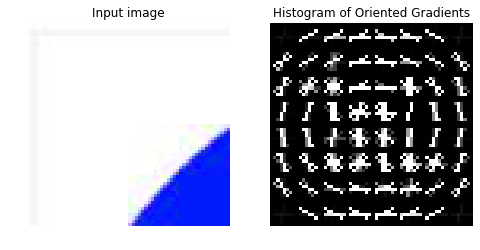

In [13]:
img = cv2.imread('C:\\Users\\duyph\\Desktop\\MATLAB\\BIENBAOGIAOTHONG\\3.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.resize(img_gray, (64,64), interpolation = cv2.INTER_AREA)
X, hog_image = hog(img_gray, orientations = 9, pixels_per_cell= (8,8), cells_per_block = (2,2), visualize = True, multichannel = False)
X = X.reshape(-1,1764)
a = clf.predict(X)
if a == 0:
    print("re trai")
elif a == 1:
    print("re phai")
else:
    print("khong co bien bao")

# Displpay    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

